# Computer Vision Mathematics: Exploring applications of the Fast Fourier Transform

### Summary
This spring, I studied matrix algebra topics related to computer vision. My study focused on 3 main components: review of linear algebra with focus on Singular Value Decomposition, 3d robotics and camera intrinsics, and finally the Fourier Transform.

### Purpose
This is a final project for CS390 in which I explore one application of fourier transforms in image compression.

## Fourier Transforms: What are they?

The SVD states $A=U \Sigma V^\top$, and $\Sigma$ contains all the singular values of $A$ on its diagonal. The most significant fact about the SVD theorem is that the singular values are ordered by importance. In fact, $Ak = \sigma_1 u_1 v_1 + · · · + u_k u_k v_k^\top$ is the best rank $k$ approximation to $A$. From Singular Value Decomposition, we learn that the first singular values contain the most significant information about what is inside a matrix. 

Fourier transforms provide similar abilities in their own way. 

There are many different basis functions: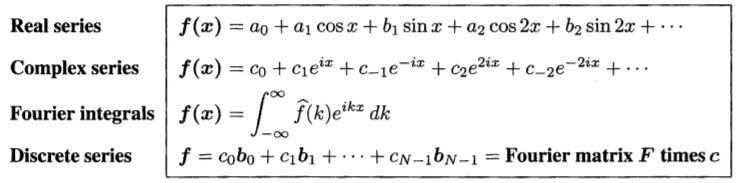 



Using the Discrete series, we can apply this to a finite data set.

Just as the first singular values contained the majority of the information about the matrix, the coefficients of the fourier decomposition which have the highest values, also bear the most information about the data they represent.

The most powerful application of this technology is that we can approximate data using far less memory.

## Example: Image Compression

Images come in many dimensions and representations. Dimensions can be as small as 16x16 pixels to 1000s of pixels in both width and height. Additionally, the color values stored at each pixel can vary in the number of bits up to 12 bits of color information (that's more than 68 billion colors!). 

All those big numbers lead to very large file sizes and this can cause difficulty when trying to share photos on the internet as well as taking up lots of space on the computer. 

To address this, modern day solutions involve image compression. JPG is an example. It actually applies a version of the Fast Fourier Transform in order to save space while maintaining the image quality.

Here I will show how it works:

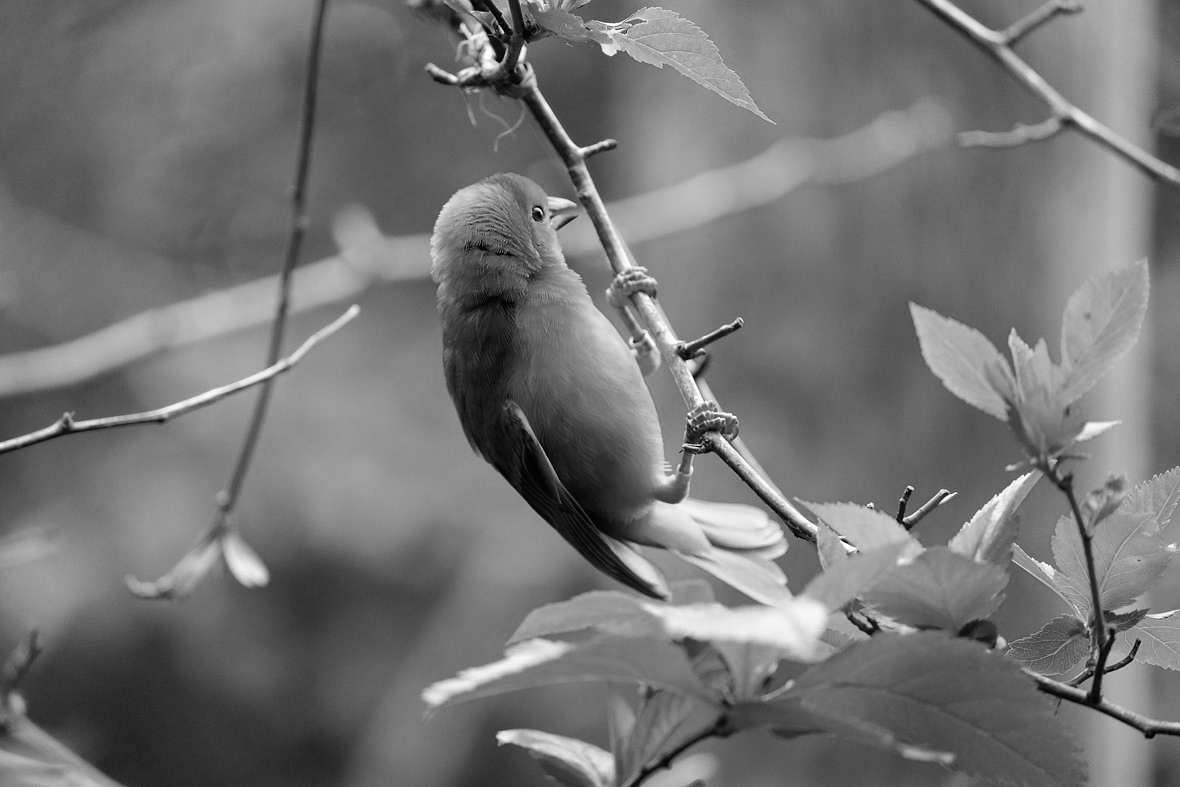

In [48]:
# Load the libraries
import cv2 as cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Get image that we want to compress
birdImage = cv2.imread('./test_images/bird.jpeg')
greyScale = np.mean(birdImage, -1)
cv2_imshow(greyScale)

In order to simplify the example, we are using greyscale becauase there is only one layer of pixel values to deal with. If we used a full RGB image, we would have to apply the a modified algorithm across the 3 pixel colors.

The algorithm implemented is an optimization of the following 2d fourier transform equation.

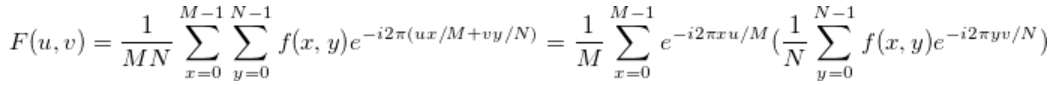

The image shown below helps visualize the kinds of fourier coeffiecients that are produced by the transform. 



/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


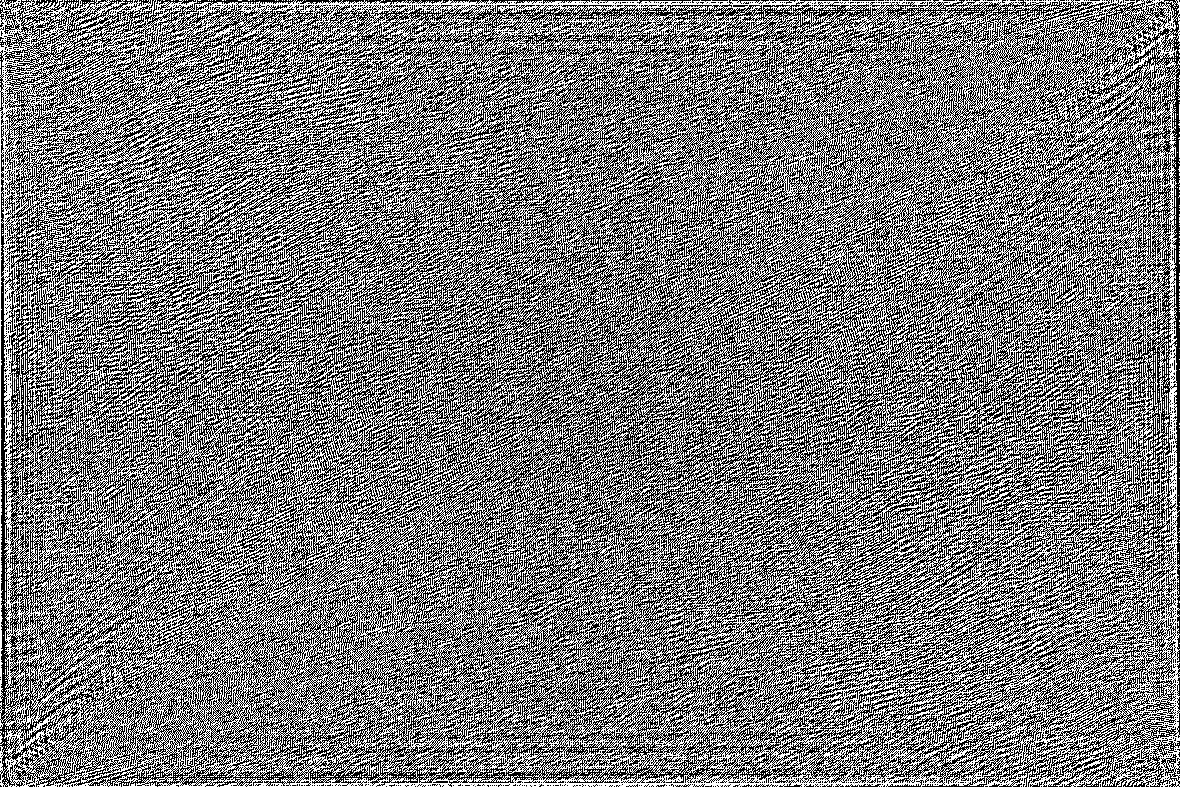

In [50]:
fft2d = np.fft.fft2(greyScale)

cv2_imshow(fft2d)

In order to compress the image, we will remove the least significant components by setting their coefficients to zero.

Here is a function that I wrote to compress an image by taking only n percent of its most significant coefficients.

In [76]:
def compress(n, fft):
  # get coefficients as 1d array
  arr = fft.reshape(-1)

  # take absolute value of all values in order to arrange by magnitude
  arr = np.abs(arr)

  # sort the coefficients by magnitude
  sorted_arr = np.sort(arr)
  print(sorted_arr[1:10])

  # choose a threshold value
  threshold_index = round((1.0-n)*len(sorted_arr))
  threshold_value = sorted_arr[threshold_index]
  print(threshold_value)

  # get a binary map that keeps coefficients that have a magnitude above the threshold value 
  keep = np.abs(fft) > threshold_value

  # zero coefficients 
  filteredFFT = fft*keep

  # reproduce the image by applying the inverse function
  compressedImage = np.fft.ifft2(filteredFFT)

  # display the image
  cv2_imshow(compressedImage)


We can observe the image compressed to 10% of its original size

[ 8.07386923  9.3269723   9.3269723   9.37658871  9.37658871  9.62091744
  9.62091744 11.15025063 11.15025063]
11853.356936961489


/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


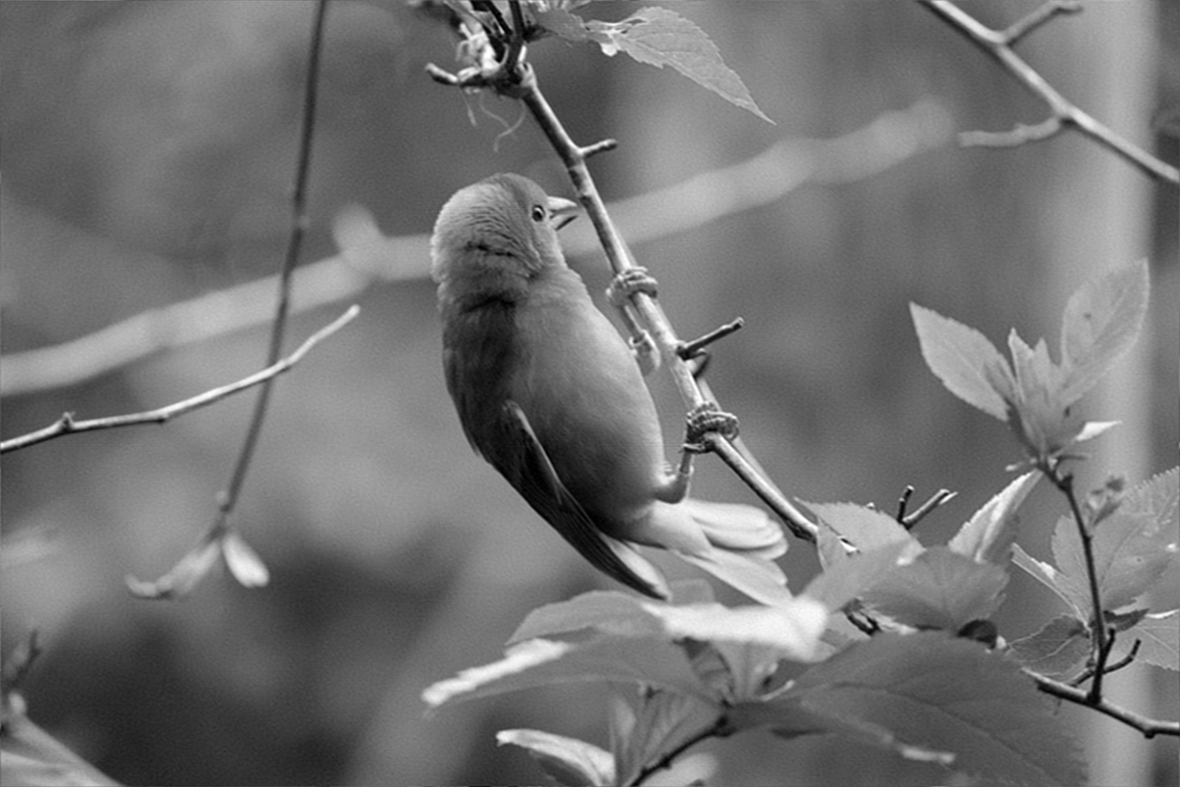

In [77]:
compress(0.1, fft2d)

We can see the image compressed to 1% of its original size

[ 8.07386923  9.3269723   9.3269723   9.37658871  9.37658871  9.62091744
  9.62091744 11.15025063 11.15025063]
77460.50004211447


/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


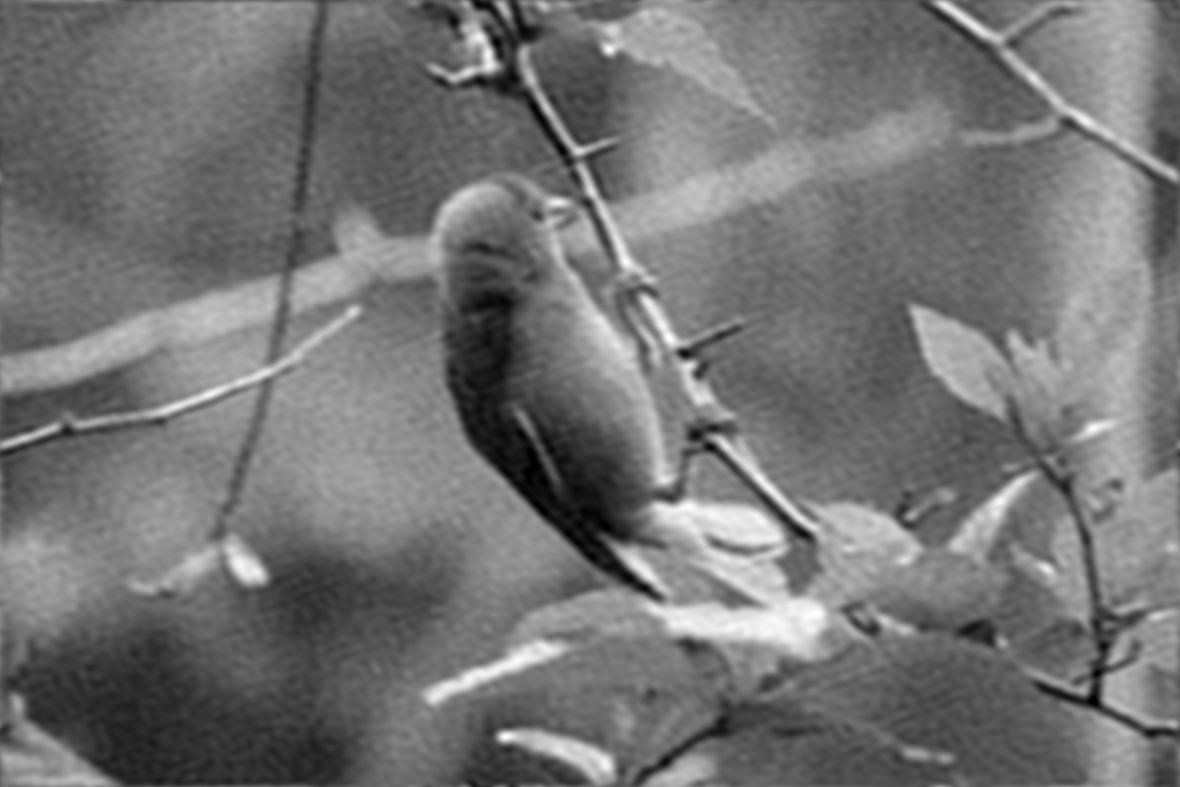

In [78]:
compress(0.01, fft2d)

And even compressed to 0.1% of its original size

[ 8.07386923  9.3269723   9.3269723   9.37658871  9.37658871  9.62091744
  9.62091744 11.15025063 11.15025063]
355280.44423770334


/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


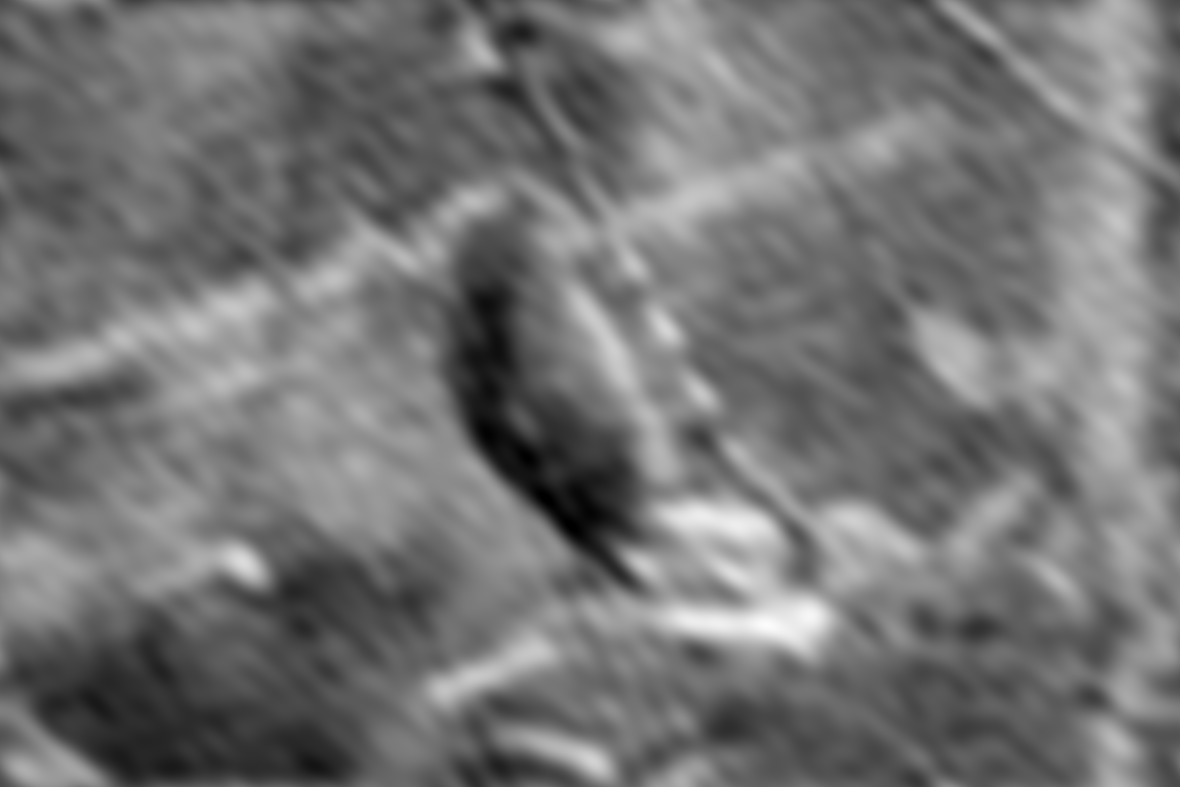

In [73]:
compress(0.001, fft2d)

## Summary

As we have seen, the fast fourier transform is very powerful and can significanly reduce the information needed to recreate a piece of data.